<a href="https://colab.research.google.com/github/thessafuzaro/ANN/blob/main/Projeto_Thessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
'''Primeiro projeto de redes neurais
Aluna: Thessa Fuzaro Mendes
Artigo: On the optimiation of froth flotation by the use of an artificial neural network [Al-Thyabat S]
Data: 11/05/2021'''

'Primeiro projeto de redes neurais\nAluna: Thessa Fuzaro Mendes\nArtigo: On the optimiation of froth flotation by the use of an artificial neural network [Al-Thyabat S]\nData: 11/05/2021'

In [360]:
#Bibliotecas necessárias
import os
import numpy as np   # biblioteca númerica do python
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
#from sklearn import preprocessing 

In [361]:
# para gerar o grafico no browser
%matplotlib inline

In [362]:
!git clone https://github.com/thessafuzaro/ANN
%cd ANN

Cloning into 'ANN'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.
/content/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN


In [363]:
# leitura dos dados
df=pd.read_csv("Dados_artigo_ANN.csv", delimiter=';')   # pelo pandas (pd) lê o arquivo no formato csv - arquivo de dados como o excel
print (df.head)

<bound method NDFrame.head of     No   Range   Mean size   Collector dosage  Impeller speed   Recovery  Grade
0    1    16-32         750              0.90             1200     98.18  68.44
1    2   16-150         553              0.56             1200     92.71  65.36
2    3    16-32         750              0.78             1200     96.74  65.58
3    4   32-270         277              0.56             1200     93.27  63.94
4    5    16-32         750              0.56             1200     94.55  73.83
5    6   32-270         277              0.78             1200     95.69  62.93
6    7    16-24         854              0.90             1200     94.19  76.38
7    8   32-270         277              0.90             1200     95.82  57.30
8    9   32-270         277              1.12             1200     93.90  52.68
9   10   32-270         277              0.67             1200     98.13  60.60
10  11    16-24         854              1.12             1200     97.71  76.91
11  12   1

In [364]:
#Selecionando as colunas de interesse:
Dat_Select=df.iloc[:,2:].copy()

In [365]:
Dat_Select.head (5)

,Mean size,Collector dosage,Impeller speed,Recovery,Grade
0,750,0.90,1200,98.18,68.44
1,553,0.56,1200,92.71,65.36
2,750,0.78,1200,96.74,65.58
3,277,0.56,1200,93.27,63.94
4,750,0.56,1200,94.55,73.83


In [366]:
# Normatização dos dados:
def Normatiza(x):
  strings= list(x)
  for i in strings:
    max_x=x[i].max()
    min_x=x[i].min()
    a=(max_x+min_x)/2
    b=(max_x-min_x)/2
    x[i]=(x[i]-a)/b
  return x

In [367]:
# Retornando os dados para originais:
def Original(x,x_old):
  strings=list(x)
  for i in strings:
     max_x=x_old[i].max()
     min_x=x_old[i].min()
     a=(max_x+min_x)/2
     b=(max_x-min_x)/2
     x[i]=x[i]*b+a
  return x

In [368]:
#Separando os dados em normatizados e originais:
Dat_Old=[]
Dat_Old=Dat_Select.copy()
Dat=Normatiza(Dat_Select)

In [369]:
Dat

,Mean size,Collector dosage,Impeller speed,Recovery,Grade
0,0.731613,0.214286,-0.5,0.959621,0.373751
1,0.223226,-1.000000,-0.5,0.624962,0.161557
2,0.731613,-0.214286,-0.5,0.871520,0.176714
3,-0.489032,-1.000000,-0.5,0.659223,0.063727
4,0.731613,-1.000000,-0.5,0.737534,0.745091
5,-0.489032,-0.214286,-0.5,0.807281,-0.005856
6,1.000000,0.214286,-0.5,0.715509,0.920772
7,-0.489032,0.214286,-0.5,0.815234,-0.393731
8,-0.489032,1.000000,-0.5,0.697767,-0.712022
9,-0.489032,-0.607143,-0.5,0.956562,-0.166380


In [370]:
#Separando os dados para treino e teste da Rede Neural
Train=Dat.sample(frac=0.8,random_state=None)
Test=Dat.drop(Train.index)

In [371]:
print(Train.head)

<bound method NDFrame.head of     Mean size   Collector dosage  Impeller speed   Recovery     Grade
1     0.223226         -1.000000             -0.5  0.624962  0.161557
17    0.223226          1.000000             -1.0  0.855002 -0.283500
5    -0.489032         -0.214286             -0.5  0.807281 -0.005856
4     0.731613         -1.000000             -0.5  0.737534  0.745091
21    0.223226          1.000000              1.0  0.838483 -0.864967
9    -0.489032         -0.607143             -0.5  0.956562 -0.166380
32    0.223226         -0.214286             -1.0  0.897828 -0.645884
10    1.000000          1.000000             -0.5  0.930866  0.957286
19    0.223226         -0.214286              1.0 -1.000000  0.320703
28   -0.223226          1.000000             -1.0  0.929030 -0.478471
14    0.731613          1.000000             -0.5  1.000000  0.097485
31   -0.223226          1.000000              1.0  0.614561  0.093352
11    0.223226         -0.214286             -0.5  0.878250 

In [372]:
print(Test.head)

<bound method NDFrame.head of     Mean size   Collector dosage  Impeller speed   Recovery     Grade
2     0.731613         -0.214286             -0.5  0.871520  0.176714
6     1.000000          0.214286             -0.5  0.715509  0.920772
16    0.731613          1.000000             -1.0  0.886204  0.007234
18    0.731613         -0.214286              1.0  0.794433  0.377885
23   -0.223226          0.214286             -0.5  0.707556 -0.021013
25   -1.000000         -0.607143             -0.5 -0.855613  1.000000
26   -0.223226          1.000000             -0.5  0.781585 -0.455047>


In [373]:
# Obtendo as variaveis independentes (treino e teste)
Index=[0,1,2]
x_Train=Train.iloc[:,Index]
x_Test=Test.iloc[:,Index]
X_Old=Dat_Old.iloc[:,Index]

In [374]:
# Obtendo as variaveis dependentes Recovery e Grade (treino e teste)
y_Train=Train.iloc[:,[3,4]]
y_Test=Test.iloc[:,[3,4]]
Y_Old=Dat_Old.iloc[:,[3,4]]

In [375]:
#Definindo a Rede Neural 
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,max_iter=2000,
                     hidden_layer_sizes=(9,11),random_state=6)

In [376]:
#Treinando a Rede Neural
model.fit(x_Train, y_Train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 11), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=6, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [377]:
# Usando a rede neural treina em calculos para treino e teste
y_Calc_Train=model.predict(x_Train)
y_Calc_Test=model.predict(x_Test)

In [378]:
# Transformando a saida da rede em dataframe 
y_Calc_Train=pd.DataFrame(y_Calc_Train)
y_Calc_Test=pd.DataFrame(y_Calc_Test)
Col_Names=list(y_Train)
y_Calc_Train.columns = Col_Names
y_Calc_Test.columns = Col_Names

In [379]:
# Transforma dos dados calculados na forma original (não normatizados)
y_Calc_Train=Original(y_Calc_Train,Y_Old)
y_Calc_Test=Original(y_Calc_Test,Y_Old)

In [380]:
# Recuperando os dados originais 
Test=[]
Train=[]
Train=Original(y_Train,Y_Old)
Test=Original(y_Test,Y_Old)

In [381]:
Train

,Recovery,Grade
1,92.71,65.36
17,96.47,58.90
5,95.69,62.93
4,94.55,73.83
21,96.20,50.46
9,98.13,60.60
32,97.17,53.64
10,97.71,76.91
19,66.15,67.67
28,97.68,56.07


In [382]:
Test

,Recovery,Grade
2,96.74,65.58
6,94.19,76.38
16,96.98,63.12
18,95.48,68.50
23,94.06,62.71
25,68.51,77.53
26,95.27,56.41


In [383]:
# Escolhendo uma das resposta para fazer o gráfico (Teino - Recovery)
Obs_Train_Recovery=[]
Calc_Train_Recovery=[]
Calc_Train_Recovery=y_Calc_Train['Recovery'].copy()
Obs_Train_Recovery=Train['Recovery'].copy()

In [384]:
# Escolhendo uma das resposta para fazer o grafico (Teste- Recovery)
Obs_Test_Recovery=[]
Calc_Test_Recovery=[]
Calc_Test_Recovery=y_Calc_Test['Recovery'].copy()
Obs_Test_Recovery=Test['Recovery'].copy()

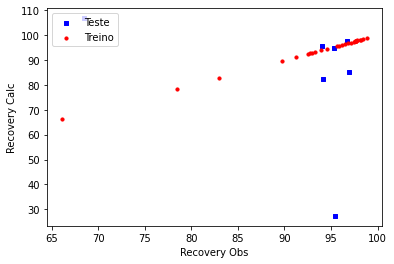

In [385]:
# Expressando os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Obs_Test_Recovery,Calc_Test_Recovery, s=10, c='b', marker="s", label='Teste')
ax1.scatter(Obs_Train_Recovery,Calc_Train_Recovery, s=10, c='r', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.ylabel('Recovery Calc')
plt.xlabel('Recovery Obs')
plt.show()

In [386]:
MSE_Recovery_Test=mean_squared_error(Obs_Test_Recovery,Calc_Test_Recovery)
print("MSE Recovery Teste=",MSE_Recovery_Test)
R2_Recovery_Test=r2_score(Obs_Test_Recovery,Calc_Test_Recovery)
print("R^2 Recovery Teste=",R2_Recovery_Test)

MSE Recovery Teste= 914.233969738863
R^2 Recovery Teste= -9.161462187695259


In [387]:
MSE_Recovery_Train=mean_squared_error(Obs_Train_Recovery,Calc_Train_Recovery)
print("MSE Recovery Treino=",MSE_Recovery_Train)
R2_Recovery_Train=r2_score(Obs_Train_Recovery,Calc_Train_Recovery)
print("R^2 Recovery Treino=",R2_Recovery_Train)

MSE Recovery Treino= 0.0039402482738798966
R^2 Recovery Treino= 0.9999197499312038


In [388]:
# Escolhendo uma das resposta para fazer o gráfico (Teino - Grade)
Obs_Train_Grade=[]
Calc_Train_Grade=[]
Calc_Train_Grade=y_Calc_Train['Grade'].copy()
Obs_Train_Grade=Train['Grade'].copy()

In [389]:
# Escolhendo uma das resposta para fazer o grafico (Teste- Recovery)
Obs_Test_Grade=[]
Calc_Test_Grade=[]
Calc_Test_Grade=y_Calc_Test['Grade'].copy()
Obs_Test_Grade=Test['Grade'].copy()

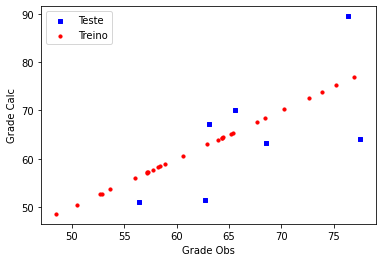

In [390]:
# Expressando os dois dados em figura (Grade)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Obs_Test_Grade,Calc_Test_Grade, s=10, c='b', marker="s", label='Teste')
ax1.scatter(Obs_Train_Grade,Calc_Train_Grade, s=10, c='r', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.ylabel('Grade Calc')
plt.xlabel('Grade Obs')
plt.show()

In [391]:
MSE_Grade_Test=mean_squared_error(Obs_Test_Grade,Calc_Test_Grade)
print("MSE Grade Teste=",MSE_Grade_Test)
R2_Grade_Test=r2_score(Obs_Test_Grade,Calc_Test_Grade)
print("R^2 Grade Teste=",R2_Grade_Test)

MSE Grade Teste= 81.7758070872572
R^2 Grade Teste= -0.6424511739509755


In [392]:
MSE_Grade_Train=mean_squared_error(Obs_Train_Grade,Calc_Train_Grade)
print("MSE Grade Treino=",MSE_Grade_Train)
R2_Grade_Train=r2_score(Obs_Train_Grade,Calc_Train_Grade)
print("R^2 Grade Treino=",R2_Grade_Train)

MSE Grade Treino= 0.0009192395755492036
R^2 Grade Treino= 0.9999834128418775
